In [2]:
import numpy as np
import scipy.integrate as itg
import matplotlib.pyplot as plt

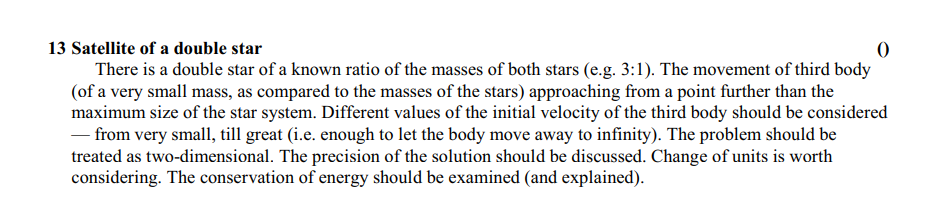

First: Solve for just the two stars, since the impact of the satelite is very small

Second: Use the solution the calculate the path of the satelite

stars should be placed as given:
larger one: -1/4r
smaller one: 3/4r
we can assume the inital r to be one

Also, change the units.
#force acting on a body = GMm/r^2

the centrifugal force = mv^2/r, mo^2r
GMm/r^2 = mv^2/rc

v = sqrt(GM rc/r^2)

For body 1 (mass 1/G):
GMm/r^2 = mv^2/rc
#GM = 3 ,m = 1/G rc = 3/4, r = 1
3 = v^2/(3/4)
v^2 = 9/4
v = 3/2

For body 2 (mass 3/G)
GMm/r^2 = mv^2/rc
#GM = 1, m = 3/G, r = 1, rc = 1/4
1 = v^2/(1/4)
v = 1/2

form of Y:
body 1: 1 , body 2: 3
[x1,y1,x2,y2,v1x,v1y,v2x,v2y]
r12 = Y[0:2]-Y[2:4]
a1 = GMm/r^2 * r12
a2 = -GMm/r^2 * r12

In [3]:
def twoStars(t,Y):

    r12 = Y[0:2]-Y[2:4]
    rd12 = np.linalg.norm(r12)
    return np.hstack((Y[4:],-3/(rd12**3)*r12,1/(rd12**3)*r12))

In [4]:
inital = np.array([3/4,0, -1/4,0, 0,3/2, 0,-1/2])*(10**0)
y = itg.solve_ivp(twoStars,(0,10),inital,max_step=0.01)

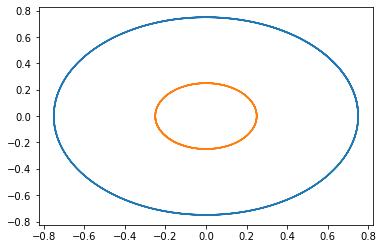

In [5]:
plt.plot(y.y[0],y.y[1])
plt.plot(y.y[2],y.y[3])

What do we neeed:
1: naive solution (full data with custom units for efficiency)#not possible/ not sensible 
2: slightly better (calculated serparatly for stars and the satelite)
3: final <probably> (analitical solution for two stars, and ivp for the satelite)

1: lets make our unit so that GM/r^2 = 1
G = 10^-11
M = 10^30 #mass of the sun
GM = 10^19
r^2 = 10^19
our unit is roughly 1gravitationalconstant mass of the sun per 10^19 m^2
our unit system 
mass - mass of the sun
distance - sqrt of 10^19

a problem
typical satelite
1000kg 
in our system 10^-27
not achivable

some analysis

lets assume one au distance between the statelite and the star
and two au distance between stars
acceleration of between star and satelite
10^-11 * 10 ^30 / 10*22 = 10^-3 sat <same order of magnitude for the other star>
10^-11 * 1^3 /10^22 = 10*-30 star 

we would need to set the 10^-30 to be 1
which is stupid

In [37]:
M1 = 1e30
M2 = 3*M1
A = 1e12
G = 6.67*1e-11

#

#we know that the proportion of distances is 3:1
r1 = A*3/4
r2 = A*1/4


v1 = np.math.sqrt((G*M2*r1/A**2))
v2 = np.math.sqrt((G*M1*r2/A**2))

starting = [-r1,0 ,r2,0 ,0,-v1 ,0,v2]

print(v1/r1,v2/r2)
t = 2*np.math.pi/(v1/r1)
print(t/(3600*24*365))
print(t)

1.6334013591276335e-08 1.6334013591276335e-08
12.197767436199507
384668793.8679877


In [13]:
def f(t,Y):
    
    r12 = Y[0:2]-Y[2:4]
    rd12 = np.linalg.norm(r12)
    return np.hstack((Y[4:],-G*M2/(rd12**3)*r12,G*M1/(rd12**3)*r12))

In [14]:

y = itg.solve_ivp(f,(0,t),starting,max_step=1000000)

In [18]:
(y.y[0:2][:,0]-y.y[0:2][:,-1])

array([  3.02416992, -11.87116432])

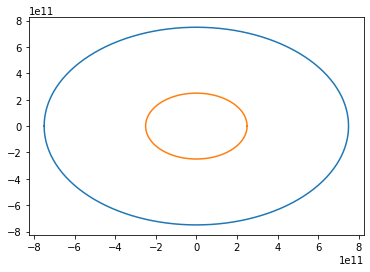

In [9]:
plt.plot(y.y[0],y.y[1])
plt.plot(y.y[2],y.y[3])

In [27]:
M1 = 1e30
M2 = 3*M1
A = 1
G = 1

#

#we know that the proportion of distances is 3:1
r1 = A*3/4
r2 = A*1/4


v1 = np.math.sqrt((G*M2*r1/A**2))
v2 = np.math.sqrt((G*M1*r2/A**2))

starting = [-r1,0 ,r2,0 ,0,-v1 ,0,v2]

print(v1/r1,v2/r2)
t = 2*np.math.pi/(v1/r1)
print(t/(3600*24*365))
print(t)

2000000000000000.0 2000000000000000.0
9.961924954305533e-23
3.141592653589793e-15


In [28]:
y = itg.solve_ivp(f,(0,t),starting,max_step=1e-18)

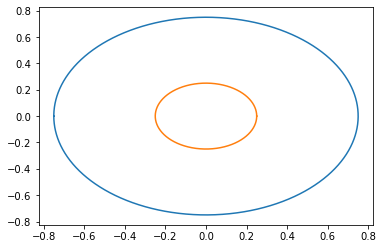

In [29]:
plt.plot(y.y[0],y.y[1])
plt.plot(y.y[2],y.y[3])

In [44]:
m1 = 1e30
m2 = m1*2
m3 = 1e3

a1 = 1e12

r1 = 3/4*a1
r2 = 1/4*a1

v1 = np.math.sqrt((G*m2*r1/a1**2))
v2 = np.math.sqrt((G*m1*r2/a1**2))


starting = [-r1,0 ,r2,0 ,0,a1     ,0,-v1 ,0,v2, 0,-1000]
t = 2*np.math.pi/(v1/r1)
print(t)

471121132.47420627


In [48]:
def threeBodies(t,Y):
    x1 = Y[:2]
    x2 = Y[2:4]
    x3 = Y[4:6]
    d12 = (x1 - x2)/np.linalg.norm(x1 - x2)**3
    d13 = (x1 - x3)/np.linalg.norm(x1 - x3)**3
    d23 = (x2 - x3)/np.linalg.norm(x2 - x3)**3
    f1 = G*(-m2*d12 - m3*d13)
    f2 = G*(m1*d12 - m3*d23)
    f3 = G*(m1*d13 + m2*d23)
    return np.hstack((Y[6:],f1,f2,f3))

In [59]:
y = itg.solve_ivp(threeBodies,(0,t),starting,max_step = 1000)

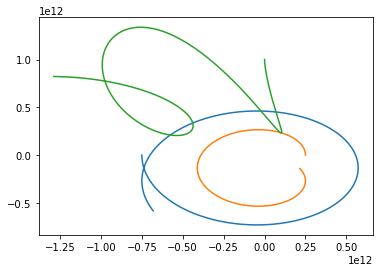

In [60]:
plt.plot(y.y[0],y.y[1])
plt.plot(y.y[2],y.y[3])
plt.plot(y.y[4],y.y[5])